<a href="https://colab.research.google.com/github/immischein/ML-bandgap/blob/victor_code/Bandgaps_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing library and imports

In [20]:
# You might need to reinstall the library manually, imports ans pip install:
!pip install mp_api

In [2]:
# Import
from mp_api.client import MPRester
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

# Example code

In [8]:
API_key = "iLfVInCUcRByjUi6YLWwuh4de2JW4xM9"
with MPRester(API_key) as mpr:
  #Please edit features you want to filter from inside the search() command. for example:
  example_docs = mpr.materials.summary.search(band_gap=(.001, None), spacegroup_number = 217)


Retrieving SummaryDoc documents:   0%|          | 0/99 [00:00<?, ?it/s]

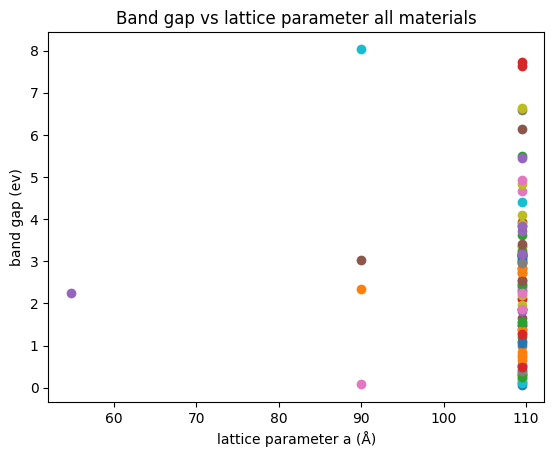

In [4]:
for i in range(len(example_docs)):
    lattice = example_docs[i].structure.lattice
    bandgap = example_docs[i].band_gap
    plt.plot(lattice.gamma, bandgap, 'o')
plt.xlabel('lattice parameter a (Å)')
plt.ylabel('band gap (ev)')
plt.title(f'Band gap vs lattice parameter all materials')
plt.savefig("bandgap all.png")


In [3]:
pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 34.7 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=2efdd7878210c0bc261b18209e1e90af7a311636ab72b12134c1fd4f5a933bff
  Stored in directory: /root/.cache/pip/wheels/16/fb/76/306387739cf9d53b1c39b0c8aadbbb17dc05f256756d8fd915
Successfully built bibtexparser


In [5]:
from pymatgen.core.periodic_table import Element

# Collect elements and their electronegativities
elements_with_en = []

for el in Element:
    if el.X is not None:  # el.X is None if not defined
        elements_with_en.append((el.symbol, el.X))

# Sort by electronegativity (optional)
elements_with_en.sort(key=lambda x: x[1], reverse=True)

# Print the results
for symbol, en in elements_with_en:
    print(f"{symbol}: {en}")

import csv

with open("electronegativities.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Element", "Electronegativity"])
    writer.writerows(elements_with_en)


He: nan
F: 3.98
O: 3.44
N: 3.04
C: 2.55
Ne: nan
Cl: 3.16
Ar: nan
Kr: 3
Br: 2.96
I: 2.66
Xe: 2.6
S: 2.58
Se: 2.55
Au: 2.54
W: 2.36
Pb: 2.33
Rh: 2.28
Pt: 2.28
H: 2.2
Ru: 2.2
Pd: 2.2
Os: 2.2
Ir: 2.2
At: 2.2
Rn: 2.2
P: 2.19
As: 2.18
Mo: 2.16
Te: 2.1
Sb: 2.05
B: 2.04
Bi: 2.02
Ge: 2.01
Hg: 2
Po: 2
Sn: 1.96
Ag: 1.93
Ni: 1.91
Si: 1.9
Cu: 1.9
Tc: 1.9
Re: 1.9
Co: 1.88
Fe: 1.83
Ga: 1.81
In: 1.78
Cd: 1.69
Cr: 1.66
Zn: 1.65
V: 1.63
Tl: 1.62
Al: 1.61
Nb: 1.6
Be: 1.57
Mn: 1.55
Ti: 1.54
Ta: 1.5
Pa: 1.5
U: 1.38
Sc: 1.36
Np: 1.36
Zr: 1.33
Mg: 1.31
Hf: 1.3
Th: 1.3
Am: 1.3
Cm: 1.3
Bk: 1.3
Cf: 1.3
Es: 1.3
Fm: 1.3
Md: 1.3
No: 1.3
Lr: 1.3
Pu: 1.28
Lu: 1.27
Tm: 1.25
Er: 1.24
Ho: 1.23
Y: 1.22
Dy: 1.22
Eu: 1.2
Gd: 1.2
Sm: 1.17
Nd: 1.14
Pr: 1.13
Pm: 1.13
Ce: 1.12
La: 1.1
Tb: 1.1
Yb: 1.1
Ac: 1.1
Ca: 1
Li: 0.98
Sr: 0.95
Na: 0.93
Ra: 0.9
Ba: 0.89
K: 0.82
Rb: 0.82
Cs: 0.79
Fr: 0.7
Rf: nan
Db: nan
Sg: nan
Bh: nan
Hs: nan
Mt: nan
Ds: nan
Rg: nan
Cn: nan
Nh: nan
Fl: nan
Mc: nan
Lv: nan
Ts: nan
Og: nan


<ipython-input-5-5fe84d4c680e>:7: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  if el.X is not None:  # el.X is None if not defined
<ipython-input-5-5fe84d4c680e>:8: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  elements_with_en.append((el.symbol, el.X))
<ipython-input-5-5fe84d4c680e>:7: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  if el.X is not None:  # el.X is None if not defined
<ipython-input-5-5fe84d4c680e>:8: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  elements_with_en.append((el.symbo

<ipython-input-7-d4a36842346f>:9: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  if el.X is not None:
<ipython-input-7-d4a36842346f>:11: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  values.append(el.X)
<ipython-input-7-d4a36842346f>:9: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  if el.X is not None:
<ipython-input-7-d4a36842346f>:11: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  values.append(el.X)
<ipython-input-7-d4a36842346f>:9: UserWarning: No Pauling electronegativity for Ar. Setting to N

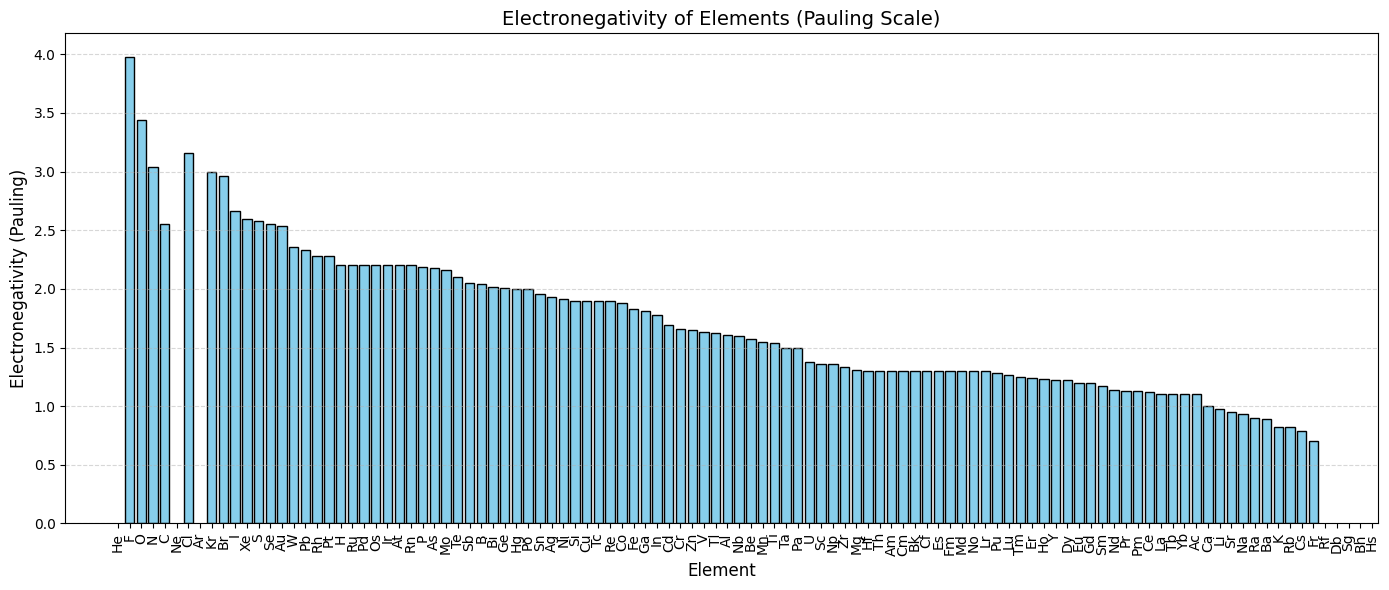

In [7]:
from pymatgen.core.periodic_table import Element
import matplotlib.pyplot as plt

# Collect elements and their electronegativities
symbols = []
values = []

for el in Element:
    if el.X is not None:
        symbols.append(el.symbol)
        values.append(el.X)

# Sort by electronegativity
sorted_pairs = sorted(zip(symbols, values), key=lambda x: x[1], reverse=True)
symbols_sorted, values_sorted = zip(*sorted_pairs)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(symbols_sorted, values_sorted, color='skyblue', edgecolor='black')
plt.xlabel("Element", fontsize=12)
plt.ylabel("Electronegativity (Pauling)", fontsize=12)
plt.title("Electronegativity of Elements (Pauling Scale)", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [10]:
with MPRester(API_key) as mpr:
    mpr.materials.summary.search?

In [11]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core.periodic_table import Element
import csv

def get_electronegativity_stats(material_ids, api_key, output_csv=None):
    """
    For each material ID, get elements and their electronegativities.
    Compute mean, max, min, and range for each compound.
    Optionally save to CSV.
    """
    results = []

    with MPRester(api_key) as mpr:
        for mid in material_ids:
            try:
                doc = mpr.query({"material_id": mid}, ["pretty_formula", "elements"])[0]
                elements = doc["elements"]
                formula = doc["pretty_formula"]

                ens = [Element(el).X for el in elements if Element(el).X is not None]

                if ens:
                    en_mean = sum(ens) / len(ens)
                    en_max = max(ens)
                    en_min = min(ens)
                    en_range = en_max - en_min
                else:
                    en_mean = en_max = en_min = en_range = None

                results.append({
                    "material_id": mid,
                    "formula": formula,
                    "elements": ", ".join(elements),
                    "mean_en": en_mean,
                    "max_en": en_max,
                    "min_en": en_min,
                    "range_en": en_range
                })
            except Exception as e:
                print(f"Failed for {mid}: {e}")

    # Optionally save to CSV
    if output_csv:
        with open(output_csv, "w", newline="") as f:
            writer = csv.DictWriter(f, fieldnames=results[0].keys())
            writer.writeheader()
            writer.writerows(results)

    return results


In [16]:
with MPRester(API_key) as mpr:
    docs = mpr.materials.summary.search(
        fields=["material_id", "formula_pretty", "elements"],
        num_chunks=1,
        chunk_size=10
    )

    for doc in docs:
        print(f"\n{doc.material_id}: {doc.formula_pretty}")
        for el in doc.elements:
            en = Element(el).X
            print(f"  {el}: {en}")


MPRestError: 'data'. Content: b'{"detail":"Request contains query parameters which cannot be used: fields, num_chunks, chunk_size"}'

In [17]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core.periodic_table import Element

# Initialize with your Materials Project API key (get one at https://materialsproject.org/open)
API_KEY = API_key  # Replace with your actual API key

def get_material_elements_and_electronegativities(material_id):
    """
    Fetch a material from Materials Project and return its elements with electronegativities

    Args:
        material_id (str): Materials Project ID (e.g., "mp-149")

    Returns:
        dict: {element_symbol: electronegativity, ...}
    """
    with MPRester(API_KEY) as mpr:
        # Get the material structure
        structure = mpr.get_structure_by_material_id(material_id)

        # Get unique elements in the material
        elements = set(structure.species)

        # Create dictionary of element: electronegativity
        element_data = {
            str(el): Element(el).X for el in elements
        }

        return element_data

# Example usage
if __name__ == "__main__":
    # Example material IDs (silicon, graphene, perovskite)
    materials = ["mp-149", "mp-48", "mp-5052"]

    for mp_id in materials:
        print(f"\nMaterial: {mp_id}")
        element_data = get_material_elements_and_electronegativities(mp_id)

        print("Elements and electronegativities:")
        for element, en in element_data.items():
            print(f"{element}: {en:.3f} (Pauling scale)")


Material: mp-149
Elements and electronegativities:
Si: 1.900 (Pauling scale)

Material: mp-48
Elements and electronegativities:
C: 2.550 (Pauling scale)

Material: mp-5052
Elements and electronegativities:
Cd: 1.690 (Pauling scale)
O: 3.440 (Pauling scale)
Ti: 1.540 (Pauling scale)


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.ext.matproj import MPRester
from pymatgen.core.periodic_table import Element

# Initialize with your Materials Project API key
API_KEY = API_key  # Replace with your actual API key

def get_materials_data(num_materials=100):
    """
    Fetch multiple materials with band gap and electronegativity data

    Returns:
        list: List of dictionaries containing material data
    """
    with MPRester(API_KEY) as mpr:
        # Query for materials with band gap data
        results = mpr.materials.summary.search(band_gap=(.001, None), spacegroup_number = 217)

        materials_data = []
        for mat in results[:num_materials]:  # Limit to specified number
            try:
                structure = mat["structure"]
                elements = set(structure.species)
                en_data = {str(el): Element(el).X for el in elements}
                en_values = list(en_data.values())

                materials_data.append({
                    "material_id": mat["material_id"],
                    "formula": mat["pretty_formula"],
                    "elements": list(en_data.keys()),
                    "electronegativities": en_data,
                    "avg_en": np.mean(en_values),
                    "en_range": max(en_values) - min(en_values),
                    "band_gap": mat["band_gap"]
                })
            except Exception as e:
                print(f"Error processing {mat.get('material_id', 'unknown')}: {str(e)}")

        return materials_data

def plot_bandgap_vs_electronegativity(materials_data):
    """Create scatter plot of band gap vs average electronegativity"""
    plt.figure(figsize=(10, 6))

    # Extract data for plotting
    avg_en = [mat["avg_en"] for mat in materials_data]
    band_gaps = [mat["band_gap"] for mat in materials_data]
    en_ranges = [mat["en_range"] for mat in materials_data]
    formulas = [mat["formula"] for mat in materials_data]

    # Create scatter plot with color indicating electronegativity range
    sc = plt.scatter(avg_en, band_gaps, c=en_ranges,
                    cmap='viridis', alpha=0.7, s=100)

    # Add colorbar and labels
    cbar = plt.colorbar(sc)
    cbar.set_label('Electronegativity Range (max-min)')
    plt.xlabel('Average Electronegativity (Pauling scale)')
    plt.ylabel('Band Gap (eV)')
    plt.title('Band Gap vs. Average Electronegativity for 100 Materials')

    # Add some formula labels for outliers
    for i, formula in enumerate(formulas):
        if band_gaps[i] > 5 or avg_en[i] > 3 or avg_en[i] < 1:
            plt.annotate(formula, (avg_en[i], band_gaps[i]),
                         textcoords="offset points", xytext=(5,5), ha='left')

    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Get data for 100 materials
    print("Fetching data from Materials Project...")
    materials_data = get_materials_data(10)

    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Average band gap: {np.mean([mat['band_gap'] for mat in materials_data]):.2f} eV")
    print(f"Average electronegativity: {np.mean([mat['avg_en'] for mat in materials_data]):.2f}")
    print(f"Average EN range: {np.mean([mat['en_range'] for mat in materials_data]):.2f}")

    # Show some example materials
    print("\nExample Materials:")
    for mat in materials_data[:3]:
        print(f"\n{mat['formula']} ({mat['material_id']})")
        print(f"Band gap: {mat['band_gap']:.2f} eV")
        print(f"Avg EN: {mat['avg_en']:.2f}, EN range: {mat['en_range']:.2f}")
        print("Elements:", ", ".join(f"{el}: {en:.2f}" for el, en in mat['electronegativities'].items()))

    # Create the plot
    plot_bandgap_vs_electronegativity(materials_data)

Fetching data from Materials Project...


MPRestError: 'data'. Content: b'{"detail":"Request contains query parameters which cannot be used: band_gap"}'

Fetching data from Materials Project...


Retrieving SummaryDoc documents:   0%|          | 0/99 [00:00<?, ?it/s]


Summary Statistics:
Materials retrieved: 99
Average band gap: 2.56 eV
Average electronegativity: 2.16
Average EN range: 1.77

Example Materials:

Ag3Ge5P6 (mp-17862)
Band gap: 0.54 eV
Avg EN: 2.04, EN range: 0.26
Elements: Ge: 2.01, P: 2.19, Ag: 1.93

Ag3Sn2(GeP2)3 (mp-17568)
Band gap: 0.22 eV
Avg EN: 2.02, EN range: 0.26
Elements: Ge: 2.01, Sn: 1.96, P: 2.19, Ag: 1.93

Al6Cd4SO12 (mp-9203)
Band gap: 2.71 eV
Avg EN: 2.33, EN range: 1.83
Elements: Cd: 1.69, S: 2.58, Al: 1.61, O: 3.44


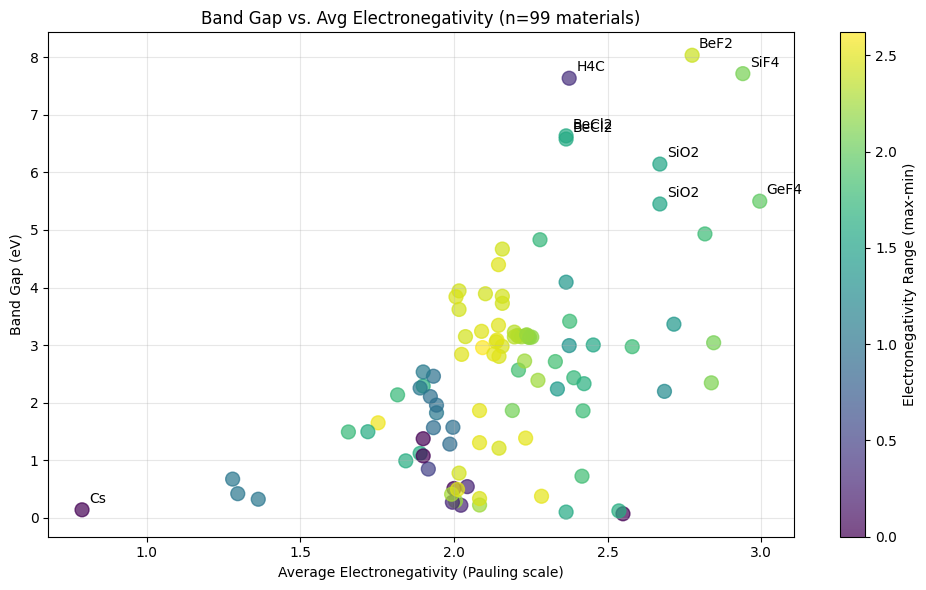

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.periodic_table import Element

# Initialize with your Materials Project API key
API_KEY = API_key  # Replace with your actual API key

def get_materials_data(num_materials=100):
    """Fetch multiple materials with band gap and electronegativity data"""
    with MPRester(API_KEY) as mpr:
        # Query materials with band gap data
        results = mpr.materials.summary.search(band_gap=(.001, None), spacegroup_number = 217)

        materials_data = []
        for mat in results:
            try:
                structure = mat.structure
                elements = set(structure.species)
                en_data = {str(el): Element(el).X for el in elements}
                en_values = list(en_data.values())

                materials_data.append({
                    "material_id": mat.material_id,
                    "formula": mat.formula_pretty,
                    "elements": list(en_data.keys()),
                    "electronegativities": en_data,
                    "avg_en": np.mean(en_values),
                    "en_range": max(en_values) - min(en_values),
                    "band_gap": mat.band_gap
                })

                if len(materials_data) >= num_materials:
                    break

            except Exception as e:
                print(f"Error processing {getattr(mat, 'material_id', 'unknown')}: {str(e)}")

        return materials_data

def plot_bandgap_vs_electronegativity(materials_data):
    """Create scatter plot of band gap vs average electronegativity"""
    plt.figure(figsize=(10, 6))

    avg_en = [mat["avg_en"] for mat in materials_data]
    band_gaps = [mat["band_gap"] for mat in materials_data]
    en_ranges = [mat["en_range"] for mat in materials_data]
    formulas = [mat["formula"] for mat in materials_data]

    sc = plt.scatter(avg_en, band_gaps, c=en_ranges,
                    cmap='viridis', alpha=0.7, s=100)

    cbar = plt.colorbar(sc)
    cbar.set_label('Electronegativity Range (max-min)')
    plt.xlabel('Average Electronegativity (Pauling scale)')
    plt.ylabel('Band Gap (eV)')
    plt.title(f'Band Gap vs. Avg Electronegativity (n={len(materials_data)} materials)')

    # Label some interesting points
    for i, (x, y) in enumerate(zip(avg_en, band_gaps)):
        if y > 5 or x > 3 or x < 1:  # Label outliers
            plt.annotate(formulas[i], (x, y),
                         textcoords="offset points", xytext=(5,5), ha='left')

    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # First install required packages:
    # pip install mp-api pymatgen matplotlib numpy

    print("Fetching data from Materials Project...")
    materials_data = get_materials_data(100)

    if not materials_data:
        print("No materials data retrieved. Check your API key and connection.")
    else:
        print("\nSummary Statistics:")
        print(f"Materials retrieved: {len(materials_data)}")
        print(f"Average band gap: {np.mean([mat['band_gap'] for mat in materials_data]):.2f} eV")
        print(f"Average electronegativity: {np.mean([mat['avg_en'] for mat in materials_data]):.2f}")
        print(f"Average EN range: {np.mean([mat['en_range'] for mat in materials_data]):.2f}")

        print("\nExample Materials:")
        for mat in materials_data[:3]:
            print(f"\n{mat['formula']} ({mat['material_id']})")
            print(f"Band gap: {mat['band_gap']:.2f} eV")
            print(f"Avg EN: {mat['avg_en']:.2f}, EN range: {mat['en_range']:.2f}")
            print("Elements:", ", ".join(f"{el}: {en:.2f}" for el, en in mat['electronegativities'].items()))

        plot_bandgap_vs_electronegativity(materials_data)